In [1]:
import cv2
import pickle
import glob
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
images_iterator = glob.glob('./data/YoLo_Format/images/*.jpg')
vertices_iterator = glob.glob('./data/YoLo_Format/vertices/*.npy')

In [4]:
img1 = next(iter(images_iterator))
vertices1 = next(iter(vertices_iterator))

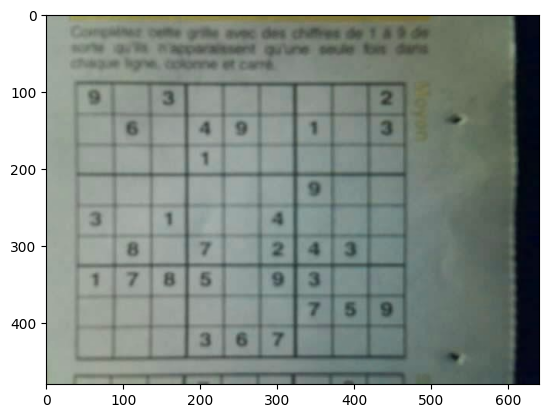

In [5]:
img = cv2.imread(img1)
plt.imshow(img)

[[[ 35  88]]

 [[ 37 449]]

 [[469 447]]

 [[467  87]]]


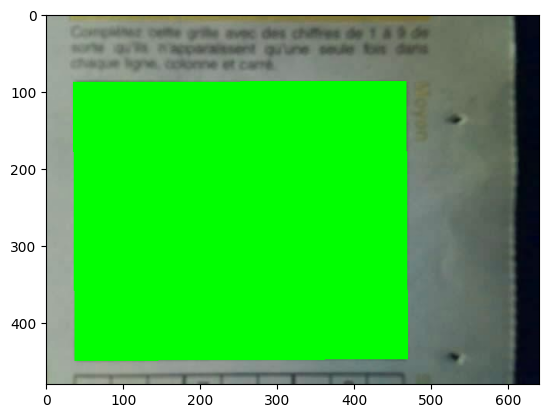

In [7]:
drawn = img.copy()
vertices = np.load(vertices1)
print(vertices)
cv2.fillPoly(drawn, [vertices], (0, 255, 0))
plt.imshow(drawn)

In [20]:
def get_bounding_box(vertices):
    x = vertices[:, 0, 0]
    y = vertices[:, 0, 1]
    x1 = int(min(x))
    x2 = int(max(x))
    y1 = int(min(y))
    y2 = int(max(y))
    return x1, y1, x2, y2
get_bounding_box(vertices)

(35, 87, 469, 449)

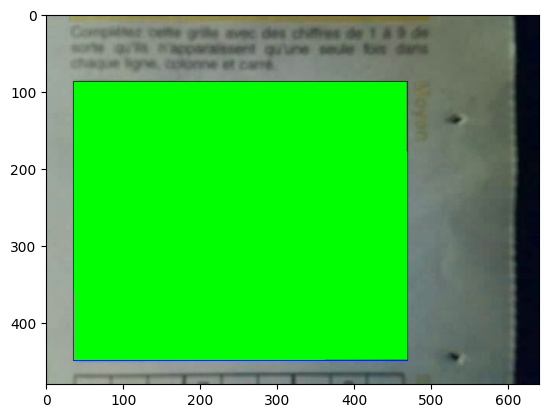

In [22]:
xmin, ymin, xmax, ymax = get_bounding_box(vertices)
drawn_box = drawn.copy()
cv2.rectangle(drawn_box, (xmin, ymin), (xmax, ymax), (0, 0, 255), 1)
plt.imshow(drawn_box)

In [7]:
os.makedirs('./data/masks', exist_ok=True)
os.makedirs('./data/drawn/',exist_ok=True)
for idx,(img,vertex) in enumerate(zip(images_iterator,vertices_iterator)):
    img = cv2.imread(img)
    h,w,_ = img.shape
    mask = np.zeros((h,w),dtype=np.uint8)
    vertex = np.load(vertex)
    cv2.fillPoly(mask, [vertex], 255)
    drawn = img.copy()
    cv2.fillPoly(drawn, [vertex], (0, 255, 0))
    result = cv2.hconcat([img,drawn])
    cv2.imwrite('./data/masks/'+str(idx)+'.jpg',mask)
    cv2.imwrite('./data/drawn/'+str(idx)+'.jpg',result)